## Heart Attact Predictor Models

Heart attack data from Kaggle, with some light EDA and cleaning, followed by a few working models developed using a pipeline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
banerjee_df = pd.read_csv('../data/heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns', None)
banerjee_df.info()
banerjee_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
ulianova_df = pd.read_csv('../data/cardio_train.csv', delimiter=';')
ulianova_df.info()
ulianova_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
larxel_df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
larxel_df.info()
larxel_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
fedesoriano_df = pd.read_csv('../data/heart.csv')
fedesoriano_df.info()
fedesoriano_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
a_df = pd.read_csv('../data/framingham.csv')
a_df.info()
a_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
akshat_df = pd.read_csv('../data/health_data.csv')
akshat_df.info()
akshat_df.head()
#metrics1_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [9]:
# Convert age from days to years
ulianova_df['age_years'] = ulianova_df['age'] / 365.25

# Display the first few rows to verify the changes
ulianova_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


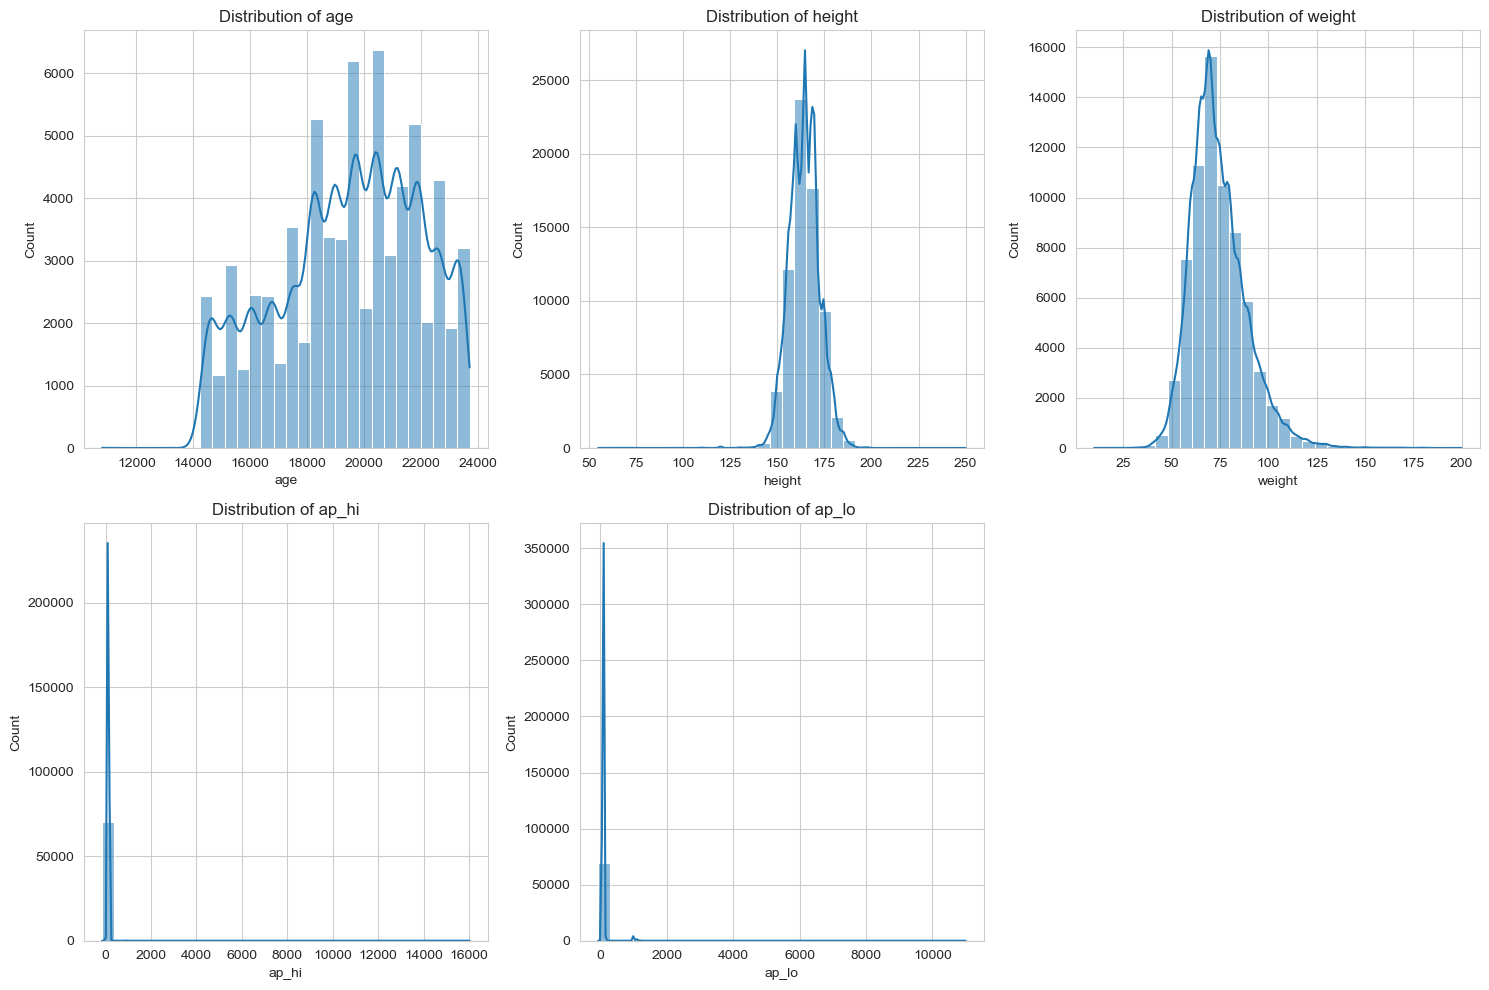

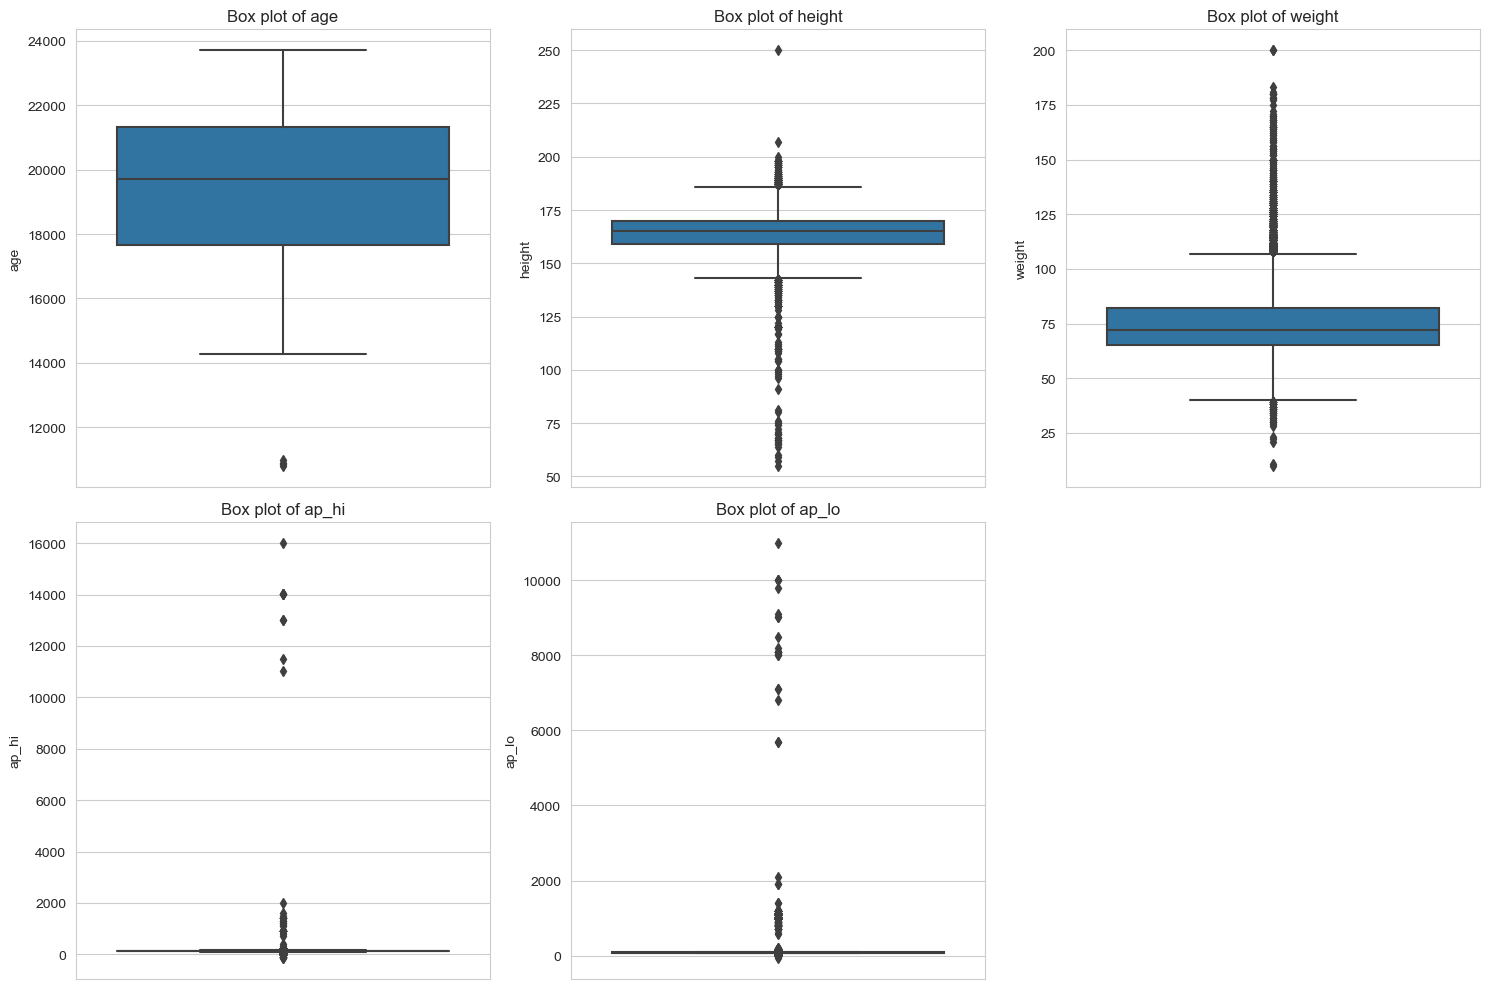

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a list of variables to plot
variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot histograms for each variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ulianova_df[variable], kde=True, bins=30)
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

# Plot box plots for each variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=ulianova_df[variable])
    plt.title(f'Box plot of {variable}')

plt.tight_layout()
plt.show()


# Outlier Removal

Based on medical guidelines,the following are reasonable ranges for systolic and diastolic blood pressure:

Systolic (ap_hi): 90 to 200 mmHg
Diastolic (ap_lo): 60 to 120 mmHg

we will remove entries that fall outside this range

In [11]:
# Apply initial filters for reasonable ranges
initial_filtered_df = ulianova_df[(ulianova_df['ap_hi'] >= 90) & (ulianova_df['ap_hi'] <= 200) &
                                  (ulianova_df['ap_lo'] >= 60) & (ulianova_df['ap_lo'] <= 120)]

# Further filter to remove rows where diastolic pressure is higher than systolic pressure
final_filtered_df = initial_filtered_df[initial_filtered_df['ap_lo'] < initial_filtered_df['ap_hi']]

# Check the impact of filtering
print("Original DataFrame size:", ulianova_df.shape[0])
print("Size after initial filtering:", initial_filtered_df.shape[0])
print("Final DataFrame size after removing 'ap_lo > ap_hi' cases:", final_filtered_df.shape[0])
print("Total number of rows removed:", ulianova_df.shape[0] - final_filtered_df.shape[0])


Original DataFrame size: 70000
Size after initial filtering: 68418
Final DataFrame size after removing 'ap_lo > ap_hi' cases: 68413
Total number of rows removed: 1587


# Visualize the Data

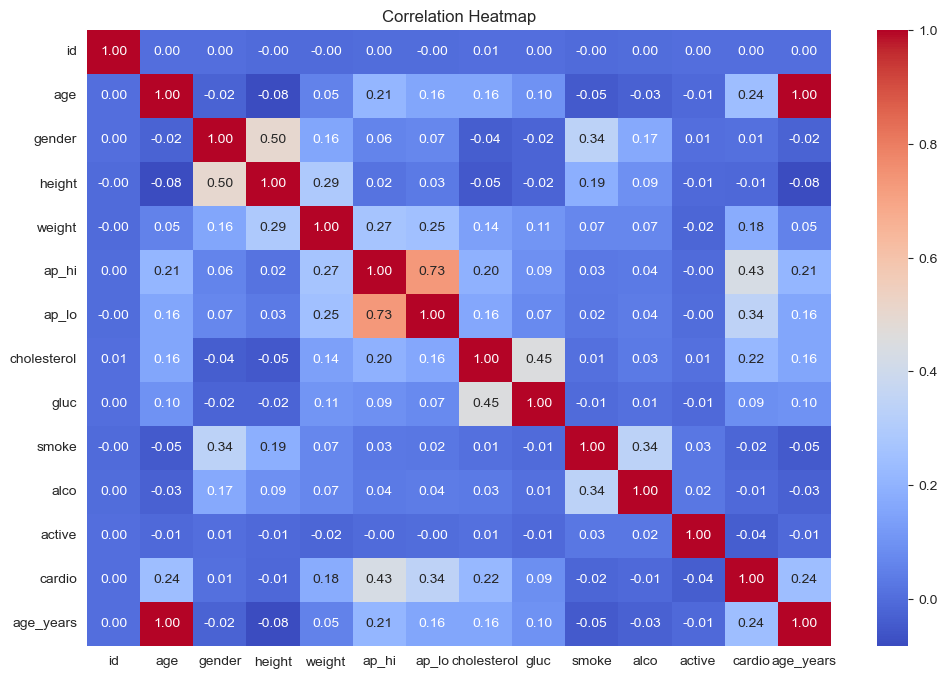

In [12]:
# Calculate correlation matrix
correlation_matrix = final_filtered_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


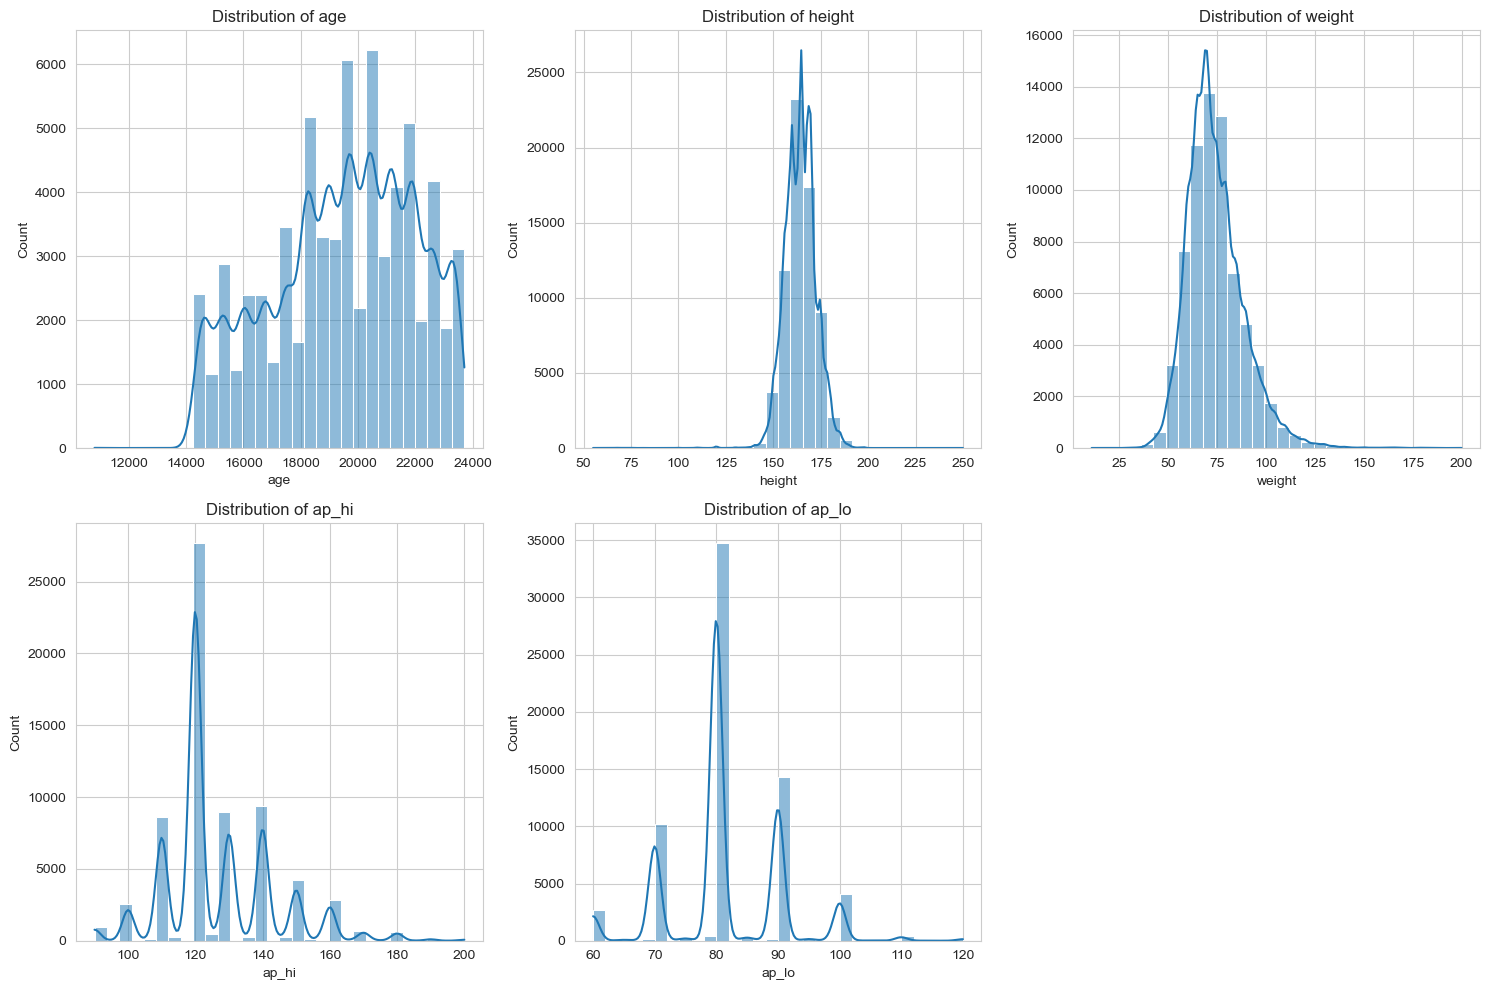

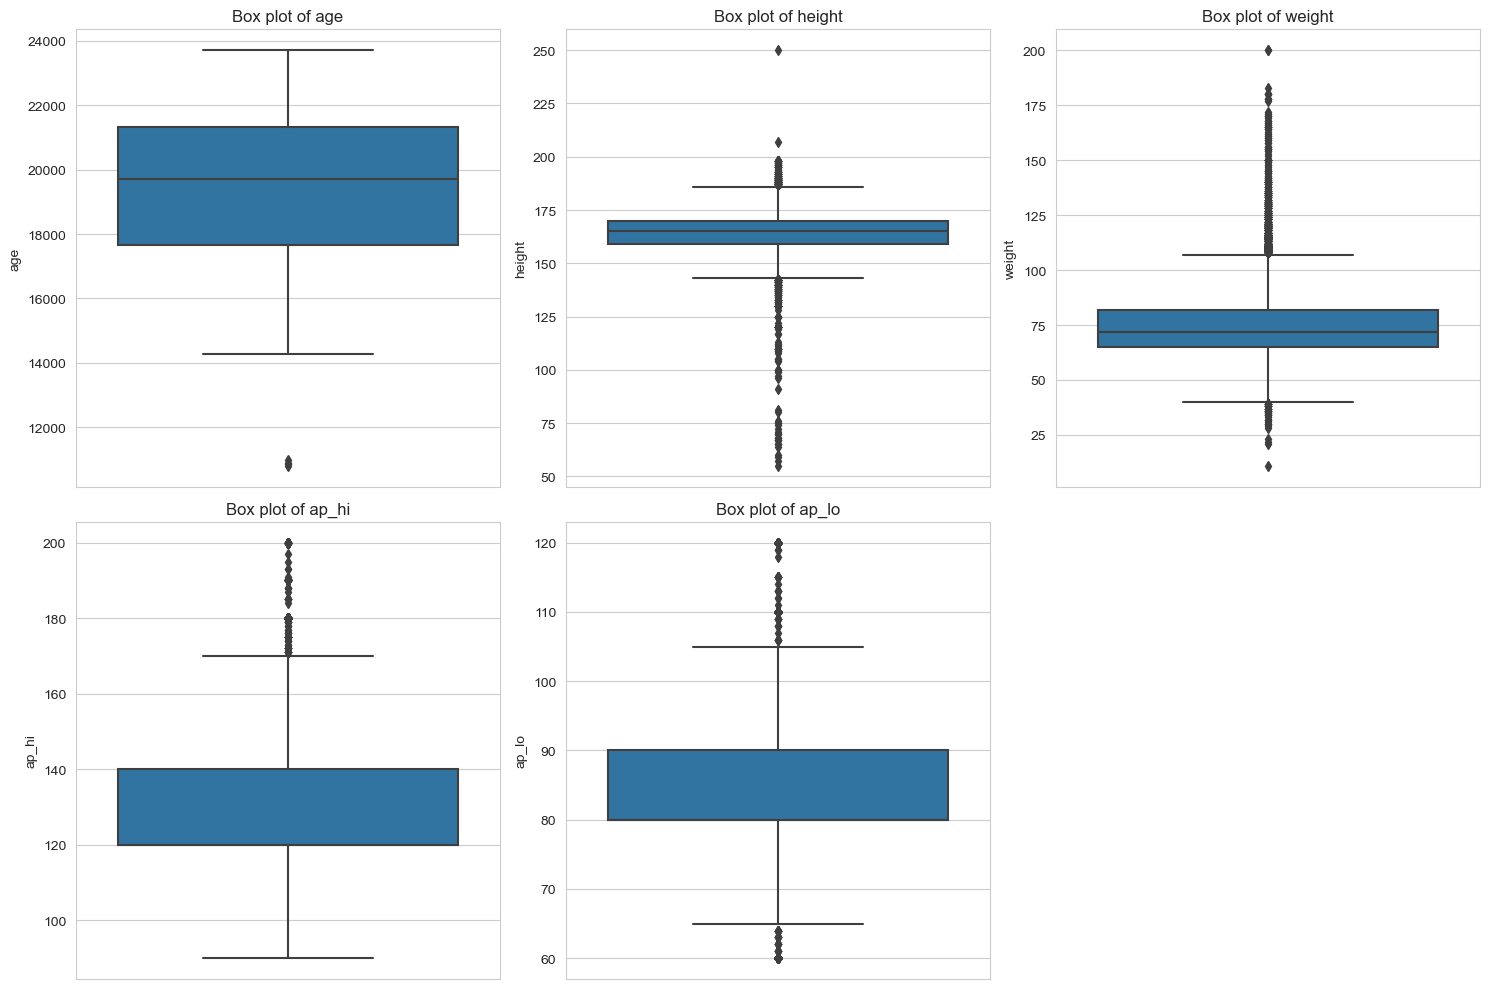

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a list of variables to plot
variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot histograms for each variable using the cleaned dataset (final_filtered_df)
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(final_filtered_df[variable], kde=True, bins=30)
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

# Plot box plots for each variable using the cleaned dataset (final_filtered_df)
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=final_filtered_df[variable])
    plt.title(f'Box plot of {variable}')

plt.tight_layout()
plt.show()


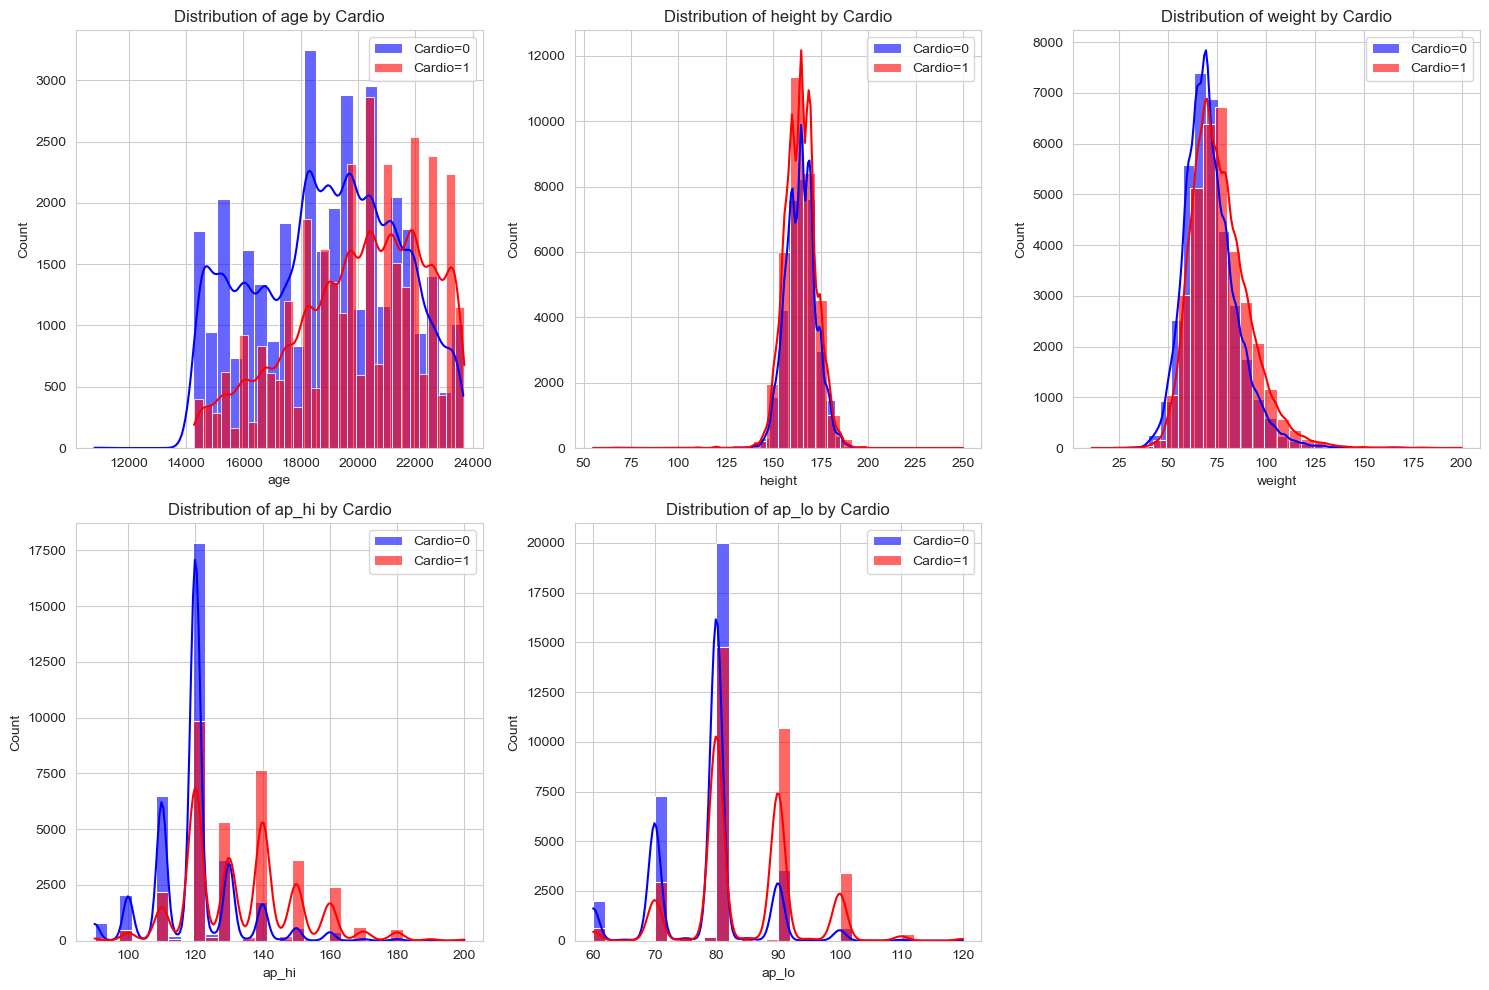

In [14]:
variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(final_filtered_df[final_filtered_df['cardio'] == 0][variable], bins=30, color='blue', kde=True, alpha=0.6, label='Cardio=0')
    sns.histplot(final_filtered_df[final_filtered_df['cardio'] == 1][variable], bins=30, color='red', kde=True, alpha=0.6, label='Cardio=1')
    plt.legend()
    plt.title(f'Distribution of {variable} by Cardio')
plt.tight_layout()
plt.show()


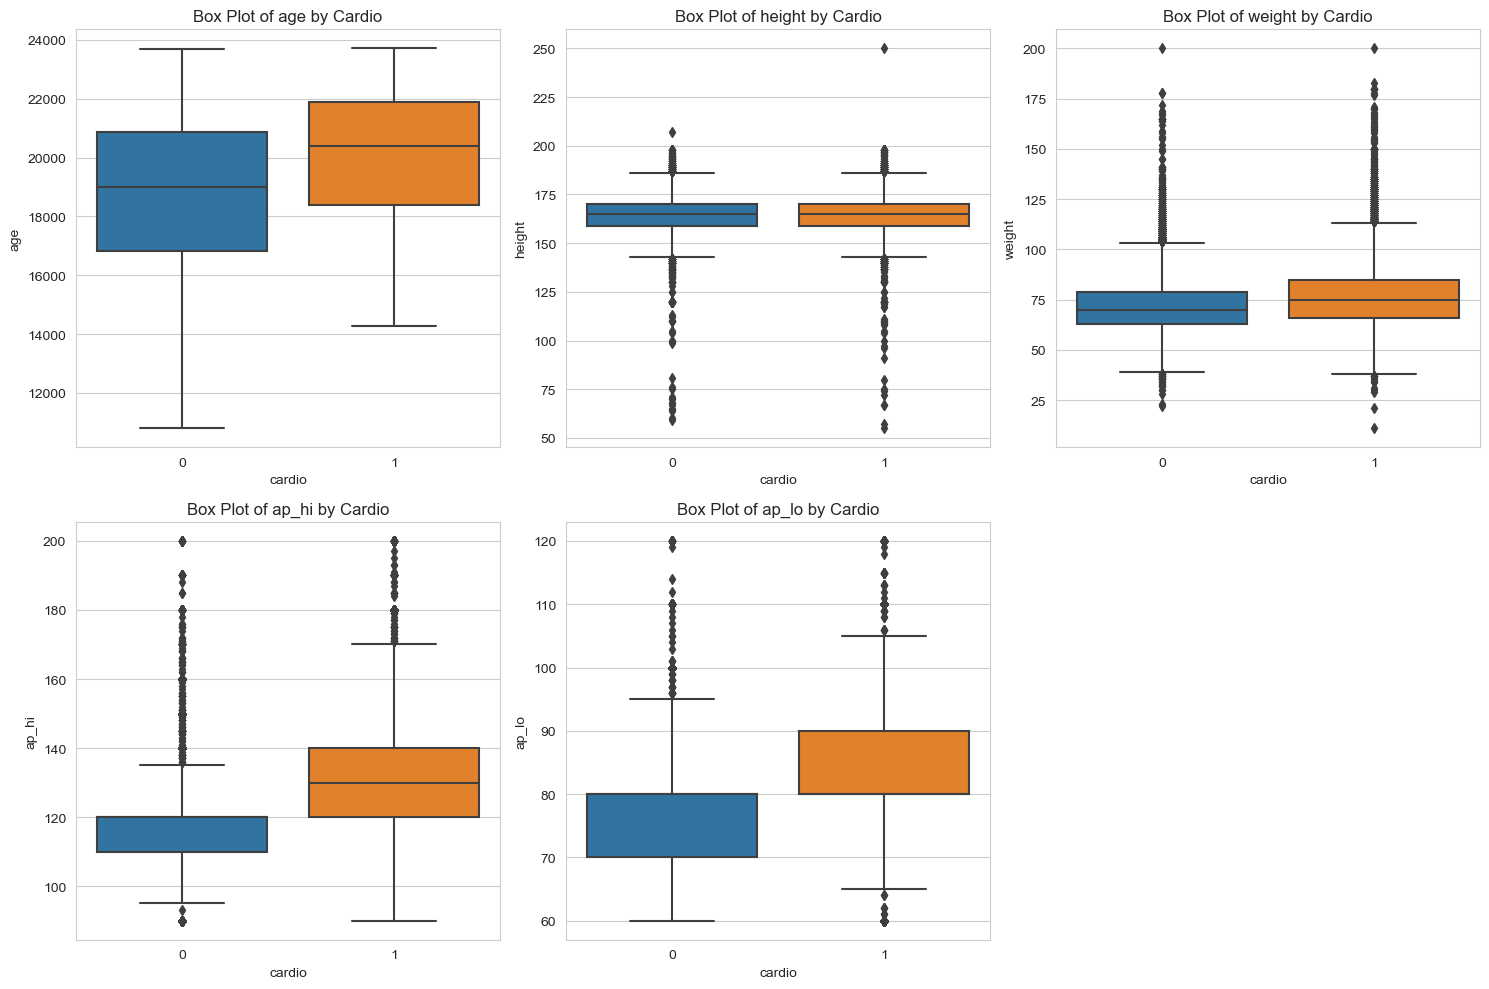

In [15]:
variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cardio', y=variable, data=final_filtered_df)
    plt.title(f'Box Plot of {variable} by Cardio')
plt.tight_layout()
plt.show()


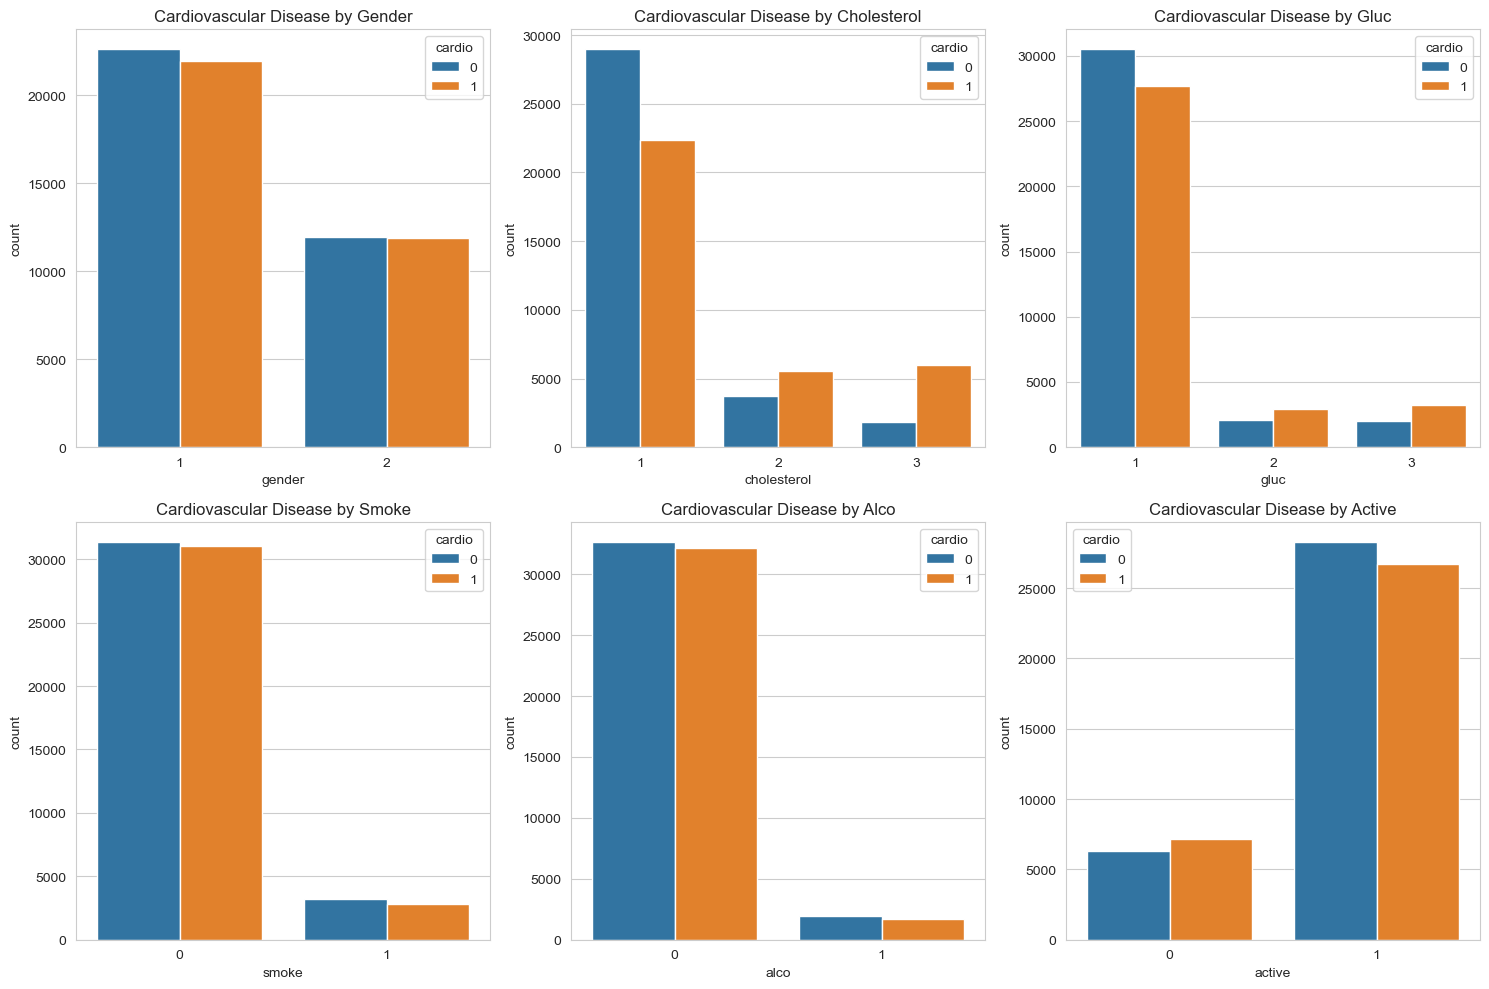

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of categorical variables
categorical_variables = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Create count plots for each categorical variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=variable, hue='cardio', data=final_filtered_df)
    plt.title(f"Cardiovascular Disease by {variable.capitalize()}")

plt.tight_layout()
plt.show()


# Let's Start Building Models!

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define X and y
X = final_filtered_df.drop(['cardio', 'id'], axis=1)
y = final_filtered_df['cardio']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale data
    ('logreg', LogisticRegression())  # Step 2: Train a logistic regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the pipeline to make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7210
Precision: 0.7470
Recall: 0.6632
F1 Score: 0.7026


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define X and y
X = final_filtered_df.drop(['cardio', 'id'], axis=1)
y = final_filtered_df['cardio']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale data
    ('rf', RandomForestClassifier(random_state=42))  # Step 2: Train a Random Forest Classifier model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the pipeline to make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7128
Precision: 0.7209
Recall: 0.6886
F1 Score: 0.7044


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier  # Corrected import statement
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define X and y
X = final_filtered_df.drop(['cardio', 'id'], axis=1)
y = final_filtered_df['cardio']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Decision Tree Classifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Note: Scaling is not necessary for Decision Trees, but kept for consistency
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_dt = pipeline_dt.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


Decision Tree Metrics:
Accuracy: 0.6301
Precision: 0.6282
Recall: 0.6261
F1 Score: 0.6271


In [20]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Define X and y
X = final_filtered_df.drop(['cardio', 'id'], axis=1)
y = final_filtered_df['cardio']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Gradient Boosting Machine Classifier
pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()),  # Scaling might not be necessary for GBM but kept for consistency
    ('gbm', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline_gbm.fit(X_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_gbm = pipeline_gbm.predict(X_test)

# Calculate metrics for Gradient Boosting Machine
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)

print(f"Gradient Boosting Machine Metrics:")
print(f"Accuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")


Gradient Boosting Machine Metrics:
Accuracy: 0.7308
Precision: 0.7460
Recall: 0.6947
F1 Score: 0.7194


In [21]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Define X and y
X = final_filtered_df.drop(['cardio', 'id'], axis=1)  # Assuming 'id' is dropped as it's not a feature
y = final_filtered_df['cardio']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to print metrics
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Neural Network (MLPClassifier) Pipeline
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(random_state=42, max_iter=300))
])
pipeline_nn.fit(X_train, y_train)
y_pred_nn = pipeline_nn.predict(X_test)
print_metrics(y_test, y_pred_nn, "Neural Network")


Neural Network Metrics:
Accuracy: 0.7267
Precision: 0.7319
Recall: 0.7100
F1 Score: 0.7208

